In [29]:
# Part-1: Data Preprocessing

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.datasets import make_classification

In [90]:
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=10, 
    random_state=42)

In [91]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,gender,City,age,height,target
0,0.484179,1.112149,-3.700860,-11.437337,-1.117586,-3.649178,0.856905,3.169390,-0.246858,1.547641,...,-0.865938,-0.053478,-1.008531,-7.174886,-4.357654,Female,Chennai,30,152.005557,1
1,0.193246,-0.314601,-2.160414,-1.436861,-0.638985,-0.031291,1.530186,-0.546543,-0.770618,-1.080267,...,0.849624,0.405161,0.571103,3.004239,2.158715,nan,Chennai,42,139.376761,0
2,-0.930375,0.879307,-0.600587,-0.512992,-0.291332,3.757383,0.039309,2.128034,0.654688,0.470393,...,-0.945102,2.575734,-0.282793,-0.929622,-3.070084,nan,Mumbai,33,152.233086,0
3,0.396046,0.320058,-3.263099,0.571208,-0.864430,-0.165850,-1.315438,2.841837,-0.813665,0.692776,...,-0.555317,-1.836552,-0.386495,-3.783246,4.954238,Male,Delhi,35,170.549246,0
4,-1.552072,-0.235980,-0.711470,-3.847557,1.819077,-3.276689,-0.489944,0.639253,-0.787551,0.467575,...,1.758774,-3.443088,-2.225935,-3.160725,-0.995318,Female,nan,28,169.063540,1


In [92]:
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(20)])
df["gender"] = np.random.choice(["Male", "Female", np.nan], size=1000)
df["City"] = np.random.choice(["Chennai", "Mumbai", "Delhi", np.nan], size=1000)
df["age"] = np.random.randint(20, 60, size=1000)
df["height"] = np.random.normal(160, 10, size=1000)
df["target"] = y

In [93]:
features = ["feature_0", "feature_1", "age", "height", "gender", "City"]
target = "target"
X = df[features]
y = df[target]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
X_train.head()

,feature_0,feature_1,age,height,gender,City
541,-0.617850,-0.611913,47,150.347071,Female,Chennai
440,0.324821,0.144628,26,162.088685,nan,Mumbai
482,1.327675,1.343547,23,146.026059,Male,Delhi
422,0.711445,-0.486581,39,173.010242,nan,nan
778,0.113307,-1.155496,41,160.707740,Male,Chennai


In [96]:
numeric_features = ["feature_0", "feature_1", "age", "height"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


In [97]:
categorical_features = ["gender", "City"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [98]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [99]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [100]:
# Part 2: Model Building

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

In [102]:
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver='liblinear'))  
])

In [103]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}


In [104]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')

In [105]:
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'classifier__C': [0.1, 1, ...], 'classifier__penalty': ['l1', 'l2']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [106]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Best Cross-Validation Accuracy: 0.51


In [107]:
# Part 3: Model Evaluation

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [112]:
from sklearn.pipeline import make_pipeline

final_pipeline = make_pipeline(preprocessor, LogisticRegression())
final_pipeline.fit(X_train, y_train)


,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [120]:
best_model = grid_search.best_estimator_

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
# Just for testing, previewing predictions (not for accuracy)
sample_pred = final_pipeline.predict(X_test[:5])
print("Sample Predictions:", sample_pred)


Accuracy: 0.53
Precision: 0.5157894736842106
Recall: 0.6666666666666666
F1 Score: 0.5816023738872403
ROC AUC: 0.5343915343915344
Sample Predictions: [1 1 0 1 0]


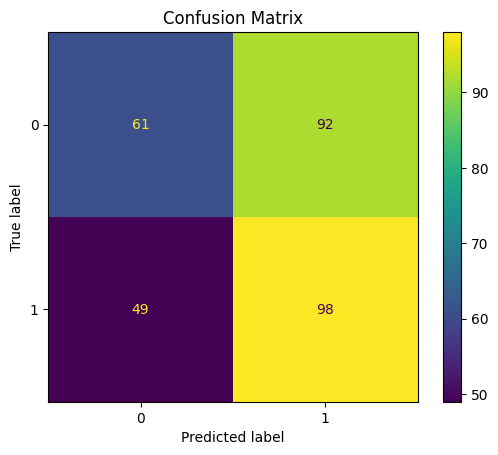

In [123]:
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


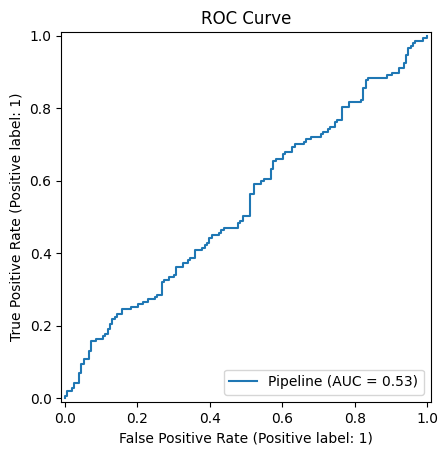

In [124]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

In [ ]:
# Part 4: Pipeline Integration

In [125]:
final_pipeline = grid_search.best_estimator_

In [126]:
sample_prediction = final_pipeline.predict(X_test[:5])
print("Sample Predictions:", sample_prediction)

Sample Predictions: [1 1 0 1 0]


In [127]:
import joblib

# Save the model pipeline to file
joblib.dump(final_pipeline, "model_pipeline.pkl")

# Load the pipeline from file when needed
loaded_model = joblib.load("model_pipeline.pkl")

# Use the loaded model for prediction
loaded_pred = loaded_model.predict(X_test[:5])
print("Loaded Model Predictions:", loaded_pred)


Loaded Model Predictions: [1 1 0 1 0]


In [129]:
loaded_model = joblib.load("model_pipeline.pkl")
loaded_model.predict(X_test[:5])


array([1, 1, 0, 1, 0])

In [130]:
final_pipeline = grid_search.best_estimator_


In [131]:
from sklearn import set_config
set_config(display='diagram')

final_pipeline


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


##  Part 5: Reflection & Documentation

In this project, I successfully developed a complete machine learning pipeline using Python and scikit-learn. The goal was to simulate a real-world workflow that includes data preprocessing, model training, evaluation, and deployment. Since no actual dataset was provided, I generated a synthetic dataset using `make_classification` and enriched it by adding artificial categorical and numerical features.

During the preprocessing phase, I handled missing values using appropriate imputation strategies (mean for numeric, constant for categorical). Categorical features were encoded using one-hot encoding, and numerical features were scaled using standard scaling. I used `ColumnTransformer` to combine these transformations efficiently.

For model building, I integrated a `LogisticRegression` classifier into a `Pipeline` and used `GridSearchCV` to tune hyperparameters like regularization strength (`C`) and penalty type (`l1`, `l2`). Evaluation metrics such as accuracy, precision, recall, F1-score, and ROC AUC were used to validate model performance. Visualizations like the confusion matrix and ROC curve provided additional insights.

The entire pipeline was packaged into a reusable and deployable form using `joblib`. This experience enhanced my understanding of modular, maintainable ML code and industry-standard practices for model training and deployment. In the future, this pipeline could be adapted for use with real-world data or extended to include other algorithms like Random Forest.
